<a href="https://colab.research.google.com/github/jonkstro/Challenges-LetsCode/blob/main/Setembro_Lista_de_Exercicios_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios Data Science - Setembro 2022

Autor: Jorge Chamby Diaz
_________

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

_______

# Questões DS

## O Problema

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro de cada 5 mortes por CVDs são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. 

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

## Os dados

A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca:

- Medidas de 11 variáveis que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - Age: idade do paciente (anos)
    - 2 - Sex: sexo do paciente (M: Masculino, F: Feminino)
    - 3 - ChestPainType: tipo de dor no peito (TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática)
    - 4 - RestingBP: pressão arterial de repouso (mm Hg)
    - 5 - Cholesterol: colesterol sérico (mm/dl)
    - 6 - FastingBS: glicemia em jejum (1: se FastingBS > 120 mg/dl, 0: caso contrário)
    - 7 - RestingECG: resultados do eletrocardiograma de repouso (Normal: normal, ST: com anormalidade da onda ST-T, LVH: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes)
    - 8 - MaxHR: frequência cardíaca máxima alcançada (Valor numérico entre 60 e 202)
    - 9 - ExerciseAngina: angina induzida por exercício (Y: Sim, N: Não)
    - 10 - Oldpeak: pico antigo = ST (Valor numérico medido em depressão)
    - 11 - ST_Slope: a inclinação do segmento ST do exercício de pico (Up: upsloping, Flat: flat, Down: downsloping)    
<br><br>
- Além disso, há a variável resposta que no caso é uma variável binária:
<br><br>
    - 12 - HeartDisease: classe de saída (1: doença cardíaca, 0: normal)

Para maiores informações sobre a coleta e origem dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) 

**Para baixar os conjuntos de dados, podem acessar diretamente a este [link](https://github.com/jchambyd/Datasets/tree/main/Heart-disease)**


_______

1) Cientistas de dados com frequência precisam de ler dados de várias fontes diferentes e juntar em um único conjunto de dados. **Sejam dois datasets com a mesma estrutura de colunas, junte eles em um único dataframe. Leia os arquivos csv `heart_part1.csv` e `heart_part2.csv`.**

In [3]:
df_1 = pd.read_csv('heart_part1.csv', index_col=0)
df_2 = pd.read_csv('heart_part2.csv', index_col=0)

print('Tamanho do dataframe 1:', df_1.shape )
print('Tamanho do dataframe 2:', df_2.shape )

Tamanho do dataframe 1: (500, 12)
Tamanho do dataframe 2: (418, 12)


In [4]:
# Usamos el metodo 'concat' para juntar o datasets
df = pd.concat((df_1, df_2), axis = 0)

# - axis = 1 empilha colunas juntas.
# - axis = 0 empilha linhas juntas, desde que corresponda ao cabeçalho da coluna.

print('Tamanho do novo dataframe:', df.shape)

Tamanho do novo dataframe: (918, 12)


_______

2) Utilizando o conjunto de dados, estude a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.). Se desejar, visualize as distribuições de cada variável na amostra.

In [5]:
# Usamos o metodo describe() para visualizar as  estatisticas descritivas das variaveis numericas
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


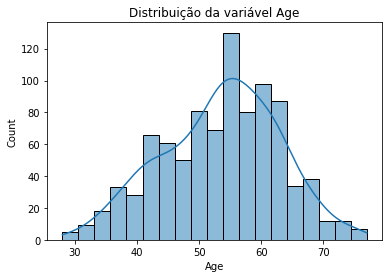

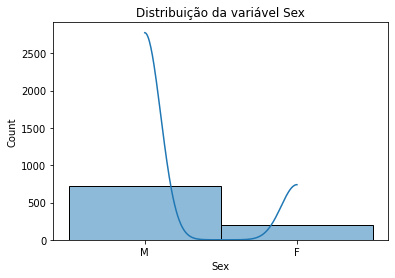

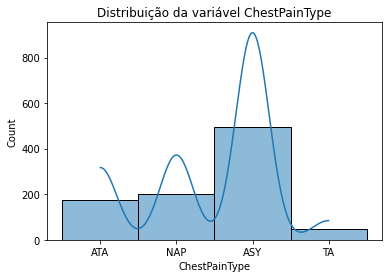

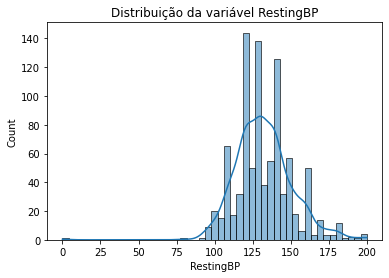

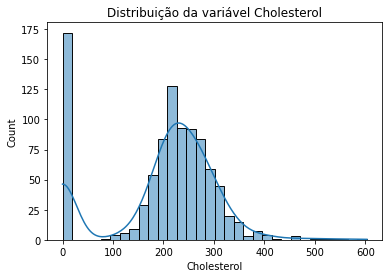

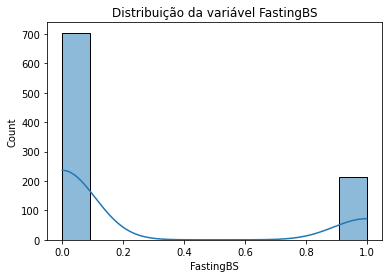

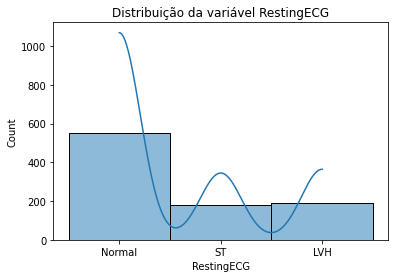

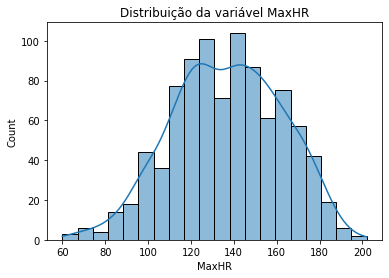

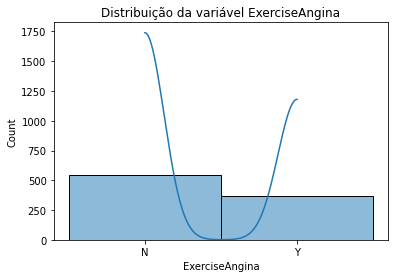

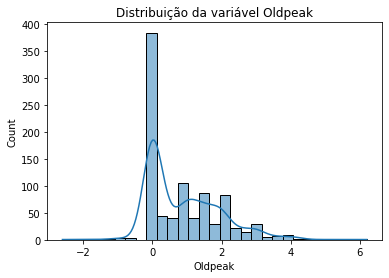

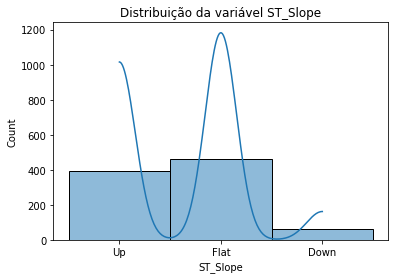

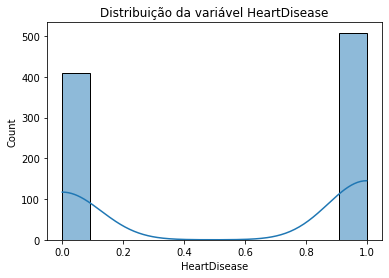

In [6]:
for col in df:
    
    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

_______

3) Muitas vezes no trabalho de um cientista de dos se tem que lidar com grandes quantidades de dados (Big data!) e é importante usar o espaço corretamente. **Visualize os diferentes tipos de dados das colunas do dataframe, e veja a quantidade de memória que o dataframe está usando atualmente.**


In [7]:
# Visualizamos a informacao do dataframe
# - memory_usage="deep" Para obter o uso total da memória

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 398.2 KB


_______

Por padrão, o Pandas sempre atribui o tipo de dados de memória mais alto às colunas, muitas vezes sem ser necessário. Por exemplo, se o Pandas interpretou uma coluna como valor inteiro, há possivelmente quatro subcategorias (assinadas) para escolher:

- int8: inteiro de 8 bits que cobre inteiros de $[-2^7, 2^7]$.
- int16: inteiro de 16 bits que cobre inteiros de $[-2^{15}, 2^{15}]$.
- int32: inteiro de 32 bits que cobre inteiros de $[-2^{31}, 2^{31}]$.
- int64: inteiro de 64 bits que cobre inteiros de $[-2^{63}, 2^{63}]$.

4) Para cada coluna inteira, **verifique os valores máximos e mínimos que atualmente estão armazenando.**

In [8]:
for col in df: 
    if df[col].dtype == np.int64:
        print("Coluna: ", col)
        print("- Maximo valor: ", df[col].max())
        print("- Minimo valor: ", df[col].min())

Coluna:  Age
- Maximo valor:  77
- Minimo valor:  28
Coluna:  RestingBP
- Maximo valor:  200
- Minimo valor:  0
Coluna:  Cholesterol
- Maximo valor:  603
- Minimo valor:  0
Coluna:  FastingBS
- Maximo valor:  1
- Minimo valor:  0
Coluna:  MaxHR
- Maximo valor:  202
- Minimo valor:  60
Coluna:  HeartDisease
- Maximo valor:  1
- Minimo valor:  0


_______

**Alterando o tipo de dados de colunas inteiras**

Pela análise do exercício 4, deu para ver que algumas dessas colunas poderiam ter um tipo de dado diferente (por causa dos valores máximos e mínimos). Por exemplo, o valor máximo da coluna 'Cholesterol' é 600, então facilmente os diferentes valores encaixam no tipo 'int16' ($[-2^{15} < 600 < 2^{15}]$). 

5) Para otimizar nosso uso de memória, **atualize os tipos de dados das colunas numéricas, e depois verifique a quantidade de memoria que o dataset agora usando.**

In [9]:
print('Uso de memória antes de alterar o tipo de dados:', df.memory_usage(deep=True).sum() / 1024, 'KB')

# Pandas fornece a flexibilidade de alterar o tipo de dados de uma coluna usando o metodo 'astype()'

df["Age"] = df.Age.astype(np.int16)
df["RestingBP"] = df.RestingBP.astype(np.int16)
df["Cholesterol"] = df.Cholesterol.astype(np.int16)
df["FastingBS"] = df.FastingBS.astype(np.int16)
df["MaxHR"] = df.MaxHR.astype(np.int16)
df["HeartDisease"] = df.HeartDisease.astype(np.int16)

print('Uso de memória depois de alterar o tipo de dados:', df.memory_usage(deep=True).sum() / 1024, 'KB')

Uso de memória antes de alterar o tipo de dados: 398.17578125 KB
Uso de memória depois de alterar o tipo de dados: 365.90234375 KB


_______

**Alterando o tipo de dados de colunas que representam dados categóricos.**

Como o nome sugere, uma coluna categórica é uma coluna que consiste em apenas alguns valores exclusivos que são repetidos várias vezes em toda a coluna. Por exemplo, vamos encontrar o número de valores exclusivos em algumas colunas usando o método `nunique()` conforme mostrado abaixo:

In [10]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

O número de valores exclusivos nessas colunas em relação ao tamanho do DataFrame mostra que são colunas categóricas. No entanto, por padrão, o Pandas inferiu o tipo de dados de todas essas colunas como 'object' (como visto no Exercício 3).

6) Usando o método `astype()`, **altere o tipo de dados de uma coluna categórica para 'category'. Analise a redução na utilização de memória.**

In [11]:
print('Uso de memória incial:', df.memory_usage(deep=True).sum() / 1024, 'KB')

# Para cada coluna com tipo de dado 'object', atualizamos para 'category'
for col in df: 
    if df[col].dtype == 'object':
        df[col] = df[col].astype("category")
        
print('Uso de memória depois de alterar o tipo de dados \'object\':', df.memory_usage(deep=True).sum() / 1024, 'KB')

Uso de memória incial: 365.90234375 KB
Uso de memória depois de alterar o tipo de dados 'object': 63.47265625 KB


_______

Os Exercicios #5 e #6 acima pressupõem que você já tenha um Pandas DataFrame carregado no ambiente python. Em outras palavras, essas eram técnicas de pós-entrada para otimizar a utilização da memória.

No entanto, em situações em que o carregamento do conjunto de dados é o principal desafio, você pode assumir o controle da tarefa de interpretação de tipo de dados realizada pelo Pandas durante a entrada e especificar o tipo de dados específico para o qual deseja que suas colunas sejam inferidas.

**7) Passe os tipos dos dados como argumento no metodo `read_csv`, para otimizar memoria desde a leitura (Leia o arquivo csv `heart.csv`).**

In [13]:
df = pd.read_csv('heart.csv', 
                   dtype = {"Age":np.int16, 
                            "Sex":"category",
                            "ChestPainType":"category", 
                            "RestingBP":np.int16, 
                            "Cholesterol":np.int16, 
                            "FastingBS":np.int16,
                            "RestingECG":"category",
                            "MaxHR":np.int16,
                            "ExerciseAngina":"category",
                            "Oldpeak":np.float64,
                            "ST_Slope":"category",
                            "HeartDisease":np.int16})

print('Uso de memória:', df.memory_usage(deep=True).sum() / 1024, 'KB')

Uso de memória: 23.8671875 KB


_______

Suponha que você tenha feito tudo o que podia, mas o CSV ainda é impossível de carregar devido a restrições de memória. Existe uma técnica que nos ajuda a carregar grandes conjuntos de dados, que você pode usar em situações tão extremas.
Os métodos de entrada dos pandas são serializados. Portanto, ele lê apenas uma linha (ou linha) por vez de um arquivo CSV. Se o número de linhas for extremamente grande para carregar na memória de uma só vez, você poderá carregar um segmento (ou bloco) de linhas, processá-lo e ler o próximo segmento do arquivo CSV.

**8) Faça a leitura do arquivo `heart.csv` em blocos de 500 linhas, e depois para cada bloco faça a soma da coluna 'HeartDisease', para saber quantas pessoas do conjunto de dados têm uma doença cardíaca.**

In [14]:
# Lendo o total de pessoas com doenca cardiaca fazendo uma unica leitura
print('Total de pessoas com doenca cardiaca:', df['HeartDisease'].sum())

bloco = 1
total = 0
# Passando o argumento 'chunksize' para o método read_csv()
for chunk in pd.read_csv("heart.csv", chunksize=500):    
    print('# de pessoas com doenca cardiaca no bloco', bloco, ':' , chunk['HeartDisease'].sum())
    bloco = bloco + 1
    total = total + chunk['HeartDisease'].sum()
    
print('Total de pessoas com doenca cardiaca (contando por blocos):', total)

Total de pessoas com doenca cardiaca: 508
# de pessoas com doenca cardiaca no bloco 1 : 284
# de pessoas com doenca cardiaca no bloco 2 : 224
Total de pessoas com doenca cardiaca (contando por blocos): 508


_______

**Analisando os dados**

9) Utilizando nosso conjunto de dados, responda: existe alguma coluna com outliers? Indique qual método de detecção de outliers você utilizou, justificando seu uso.

In [15]:
for col in df:

    if df[col].dtype != 'category':
        mu, std = df[col].mean(), df[col].std() 

        # usando o critério de |z| > 3 (não é dos melhores, mas tá ok kkkkk)
        aux_outlier = df[col].apply(lambda x: (x-mu)/std).apply(lambda x: True if abs(x) > 3 else False)
    
        if aux_outlier.sum() > 0:
        
            print(f"- Outliers de {col}:\n")
        
            print(df[aux_outlier][col].tolist())
        
        else:
            print(f"- Não há outliers na coluna {col}!")
        
        print()

- Não há outliers na coluna Age!

- Outliers de RestingBP:

[190, 200, 200, 200, 0, 190, 200, 192]

- Outliers de Cholesterol:

[529, 603, 564]

- Não há outliers na coluna FastingBS!

- Outliers de MaxHR:

[60]

- Outliers de Oldpeak:

[5.0, -2.6, 4.2, 5.6, 4.2, 6.2, 4.4]

- Não há outliers na coluna HeartDisease!



_______

**10) Utilizando o conjunto de dados, calcule e/ou visualize a correlação (utilizando a relação que achar mais adequada) entre as variáveis na base.** 

Em particular, estude a correlação entre as features e o target `HeartDisease`, e responda se há correlações fortes.

Plote também a relação entre cada uma das features e o target (na forma de um scatterplot, por exemplo).

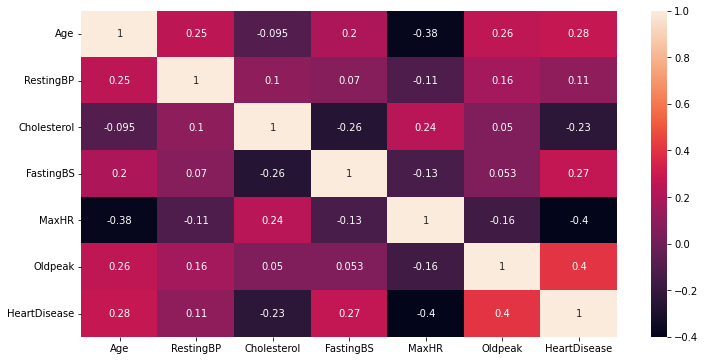

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
df.corr()["HeartDisease"].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

### PREVISÃO

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["HeartDisease", 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
y = df["HeartDisease"]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)



In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe_pca = Pipeline([("ss", StandardScaler()),
                     ("pca", PCA())]).fit(X_train)

pipe_pca["pca"].explained_variance_ratio_.cumsum()*100

array([ 30.45934583,  52.60971477,  66.74924888,  80.77443594,
        91.13516346, 100.        ])

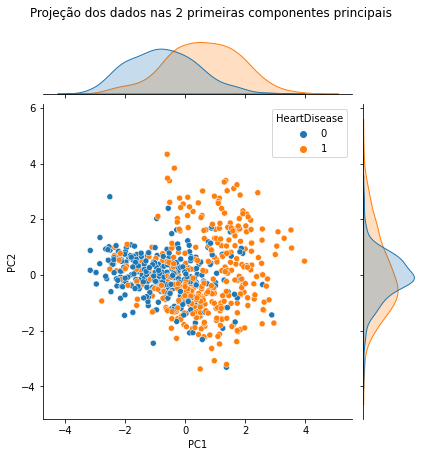

In [27]:
pipe_pca = Pipeline([("ss", StandardScaler()),
                     ("pca", PCA(n_components=2))]).fit(X_train)

x_train_pca = pd.DataFrame(pipe_pca.transform(X_train), 
                           index = X_train.index,
                           columns=[f"PC{i+1}" for i in range(pipe_pca[-1].n_components_)])

x_pca_y = pd.concat([x_train_pca, y_train], axis=1)

# ==========================

g = sns.jointplot(data=x_pca_y, x="PC1", y="PC2", hue="HeartDisease")

g.fig.suptitle(f"Projeção dos dados nas 2 primeiras componentes principais", y=1.05)

plt.show()

In [28]:
df_train.groupby("HeartDisease").mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,51.247387,130.463415,231.257840,0.094077,147.623693,0.445296
1,55.940845,133.495775,178.994366,0.326761,126.800000,1.236901


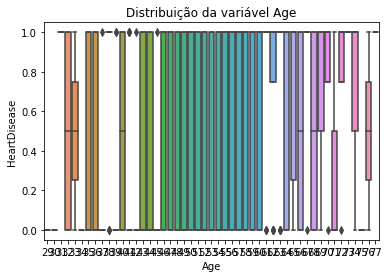

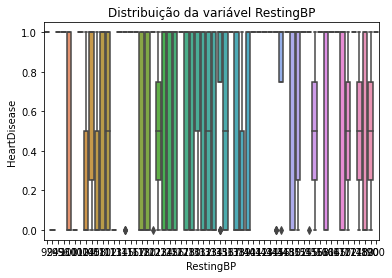

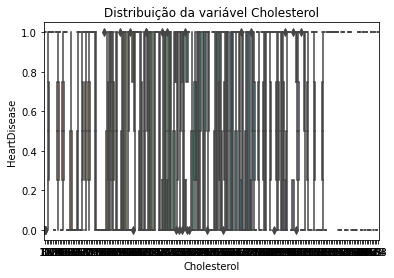

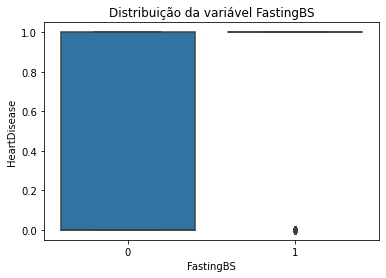

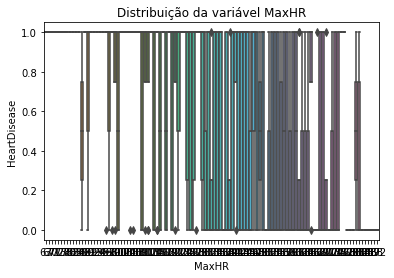

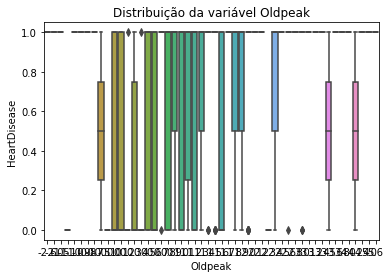

In [29]:
for col in X_train:
    
    sns.boxplot(data=df_train, x=col, y="HeartDisease").set_title(f"Distribuição da variável {col}")
    plt.show()

In [30]:
#passo 1 - importar bibliotecas

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [32]:
# passo 1 - construção do modelo

etapas = [("scaler", StandardScaler()),
          ("logit", LogisticRegression())]

pipe_logit = Pipeline(etapas).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       123
           1       0.78      0.81      0.80       153

    accuracy                           0.77       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.77      0.77      0.77       276



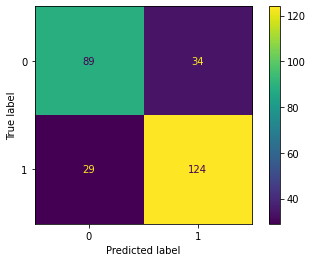

In [33]:
# passo 2 - avaliação do modelo

y_pred = pipe_logit.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
print(classification_report(y_test, y_pred))

___________